# Exercise 2


## Names:
- Matias Hendolin
- Giorgos Galanaquis

## Higgs Boson

En esta tarea trabajaremos con datos simulados del bosón de Higgs (versión simplificada), del desafío de [Kaggle](https://www.kaggle.com/c/higgs-boson/overview). Los archivos son Higgs_features.csv y Higgs_labels.csv. Las etiquetas son 0 (no hay señal de Higgs) y 1 (señal de Higgs). Las features son similares a los vistos en el set que utilizamos en clases, tales como energía faltantes, energía, momentum, rapidez transversal y azimutal, etc. Puede encontrar más detalles [acá](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). Note que el set de datos para esta tarea es una versión simplificada.

### Part 1: Description of the data



In this exercise we use simplified Higgs boson simulation data. In the data, we find different measurements of simulated events of finding the Higgs boson. The data is found in here related to a Kaggle challenge https://www.kaggle.com/c/higgs-boson/overview and extra information here https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf. We are given two data tables: features and labels.

Copy the initialization code from the week 5 notebook about support vector machines (SVM).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.svm import SVC, LinearSVC # Nuevo algoritmo!
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
#from sklearn.model_selection import train_test_split # From week 4 for decision trees
from sklearn import metrics
from sklearn.model_selection import GridSearchCV # Nuevo! Para explorar los hiperparámetros del modelo

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
rc('text', usetex=False)

Import also seaborn.

In [ ]:
import seaborn as sns

Mount to Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the Higgs features and labels to their own data sets.

In [ ]:
features = pd.read_csv('drive/MyDrive/Courses/MachineLearning/Tarea2/Higgs_features.csv', header=None, index_col=False)
labels = pd.read_csv('drive/MyDrive/Courses/MachineLearning/Tarea2/Higgs_labels.csv', header=None, index_col=False)

Show ten first rows of both of the data sets. Print the length of the datas.

In [ ]:
display(features.head(10))
display(labels.head(10))

,0,1,2,3,4,5,6,7
0,393.335,79.460,308.879,4.095,1.403,-1.411,49.063,39.478
1,71.048,29.291,55.602,2.439,1.667,-1.412,22.926,9.486
2,141.450,87.017,72.091,1.472,4.714,1.233,23.591,69.754
3,156.539,39.797,127.933,4.017,1.279,-1.408,21.415,18.222
4,89.639,34.399,66.741,2.934,1.417,-1.377,26.459,8.257
5,103.203,7.979,56.074,1.420,0.476,1.216,57.804,60.140
6,115.939,8.664,66.941,2.850,0.888,1.316,34.395,38.689
7,139.387,71.862,108.106,3.148,1.776,-1.414,40.086,19.534
8,167.206,103.613,147.509,2.762,3.356,-1.378,25.239,34.062
9,220.976,21.116,132.191,3.506,1.291,-0.299,30.196,50.960


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [ ]:
len(features)

25000

In [ ]:
len(labels)

25000

We notice how the data has 7 columns, i.e. features, and 25000 rows, i.e. events. The features are different physical features that one can measure and the labels are true or false according that is the particle believed to be the Higgs boson.

Let us see some basic information about the data and if there are any nulls.

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25000 non-null  float64
 1   1       25000 non-null  float64
 2   2       25000 non-null  float64
 3   3       25000 non-null  float64
 4   4       25000 non-null  float64
 5   5       25000 non-null  float64
 6   6       25000 non-null  float64
 7   7       25000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


No nulls.

Let us make histograms of the features to show the distribution of values. We plot every feature to the same plot as the instructions says.

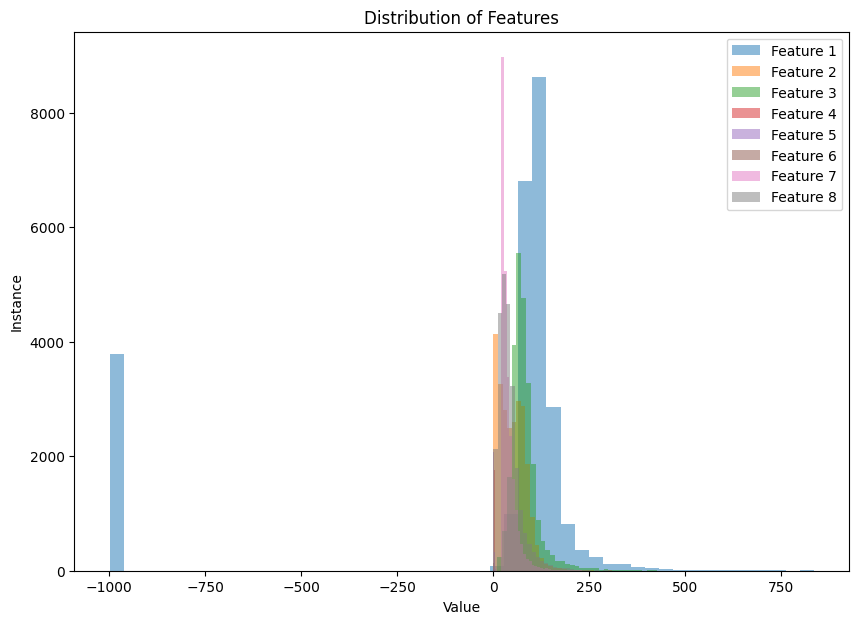

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(features.shape[1]):
    plt.hist(features[i], bins=50, alpha=0.5, label=f'Feature {i+1}')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Instance')
plt.title('Distribution of Features')
plt.show()

From the plot we see that for the Feature 1 there seems to be most of the values in the range of [0 500], some just below zero (< 0) and some just under -1000 as approximately [-1000 -950]. It then seems, that the values close to -1000 shift the parameters, for instance the mean, of the Feature 1.

Other features seem to be between [0 250] and are somewhat gaussian with Feature 7 showing a relatively high peak.

Let us run the following command to describe the data:

In [ ]:
features.describe()

,0,1,2,3,4,5,6,7
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-48.086665,49.138061,80.961395,2.371241,1.438941,-0.120674,38.688834,41.807678
std,404.976294,35.100460,39.852463,0.781237,0.846006,1.191625,22.446069,32.431353
min,-999.000000,0.005000,9.495000,0.313000,0.077000,-1.414000,20.000000,0.346000
25%,78.321000,19.260500,59.251000,1.801000,0.878000,-1.368000,24.583500,21.447000
50%,104.802000,46.791000,73.521000,2.490000,1.279000,-0.312000,31.776000,34.841000
75%,130.045250,73.275250,92.054500,2.961000,1.776000,1.229000,44.956000,51.755250
max,835.250000,595.819000,640.039000,5.655000,13.137000,1.414000,381.629000,551.060000


We see how the mean of the Feature 1 is shifted to minus values because the minimum value is -999.

Let us then see how the labels are distributed:

In [ ]:
np.sum(labels)/len(labels)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0.33896


This means that 0.33896, i.e. approximately 34%, of the data is labeled as positive (as 1, instead of 0). It means that the data is unbalanced. If we use this data to train a predicting machine learning model, larger portion of the training data is for negative labels. In this context, where we want to identify the Higgs boson in test events, we would like to have more examples of the positive results.

As metrics, since we are dealing with a classification task, we can use for instance precision (P) and recall (R). The definitions are the following:

P = TP / (TP + FP)

R = TP / (TP + FN)

TP = True Positive (event classified correctly as positive)

(TN = True Negative (event classified correctly as negative); not in the metrics)

FP = False Positive (event classified incorrectly as positive)

FN = False Negative (event classified incorrectly as negative)

### Part 2: Decision tree

In this section we will create a decision tree for which we use as the metric the recall which was defined in the previous section.

We create the decision tree by first splitting and shuffling the data with sklearn StratifiedKFold. It divides the data to wanted k amount of folds of consistent class proportions. In K fold traditionally, with k-1 we train the model and use the last fold to evaluate the data. This training and testing is done k times.

In [ ]:
modelSplit = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)

Next, we create a decision tree classifier which will be used with the split of StratifiedKFold to train a model using the cross_validate function, which in turn also calculates the metrics, i.e. the performance score, of the model. In cross validation, all of the folds are used for training and testing, one of the folds as the testing fold and the rest as training folds in turn in iteration. Of all of the iterations of the folds, the cross_validate function returns metric scores, e.g. recall scores, from which one can calculate the for instance averages and standard deviations, i.e. the average and standard deviation of the recall over every fold iteration combined.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree (DT) Classifier
# You might want to tune parameters later, but start with defaults
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation using the split of StratifiedKFold to
# train the DT classifier model and calculate recall scores
cv_results = cross_validate(dt_classifier, features, labels, cv=modelSplit, scoring='recall')

# Extract the test scores (recall in this case)
recall_scores = cv_results['test_score']

# Calculate the average and standard deviation of the scores
average_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

print(f"Average Recall: {average_recall:.4f}")
print(f"Standard Deviation of Recall: {std_recall:.4f}")

# You can similarly calculate for precision if desired
# cv_results_precision = cross_validate(dt_classifier, features, labels, cv=DTmodel, scoring='precision')
# precision_scores = cv_results_precision['test_score']
# average_precision = np.mean(precision_scores)
# std_precision = np.std(precision_scores)
# print(f"Average Precision: {average_precision:.4f}")
# print(f"Standard Deviation of Precision: {std_precision:.4f}")

Average Recall: 0.6332
Standard Deviation of Recall: 0.0087


We see that the average recall of all the scores of the folds for testing is 0.6332. This means that averagely the model classifies the events that truly were positive approximately 63% correctly as positive and 37% incorrectly as negative. The standard deviation is 0.0087 between the folds, meaning that the performance of the different folds were very similar: their results of classifying were close to each other. The small standard deviation is made possible by the StratifiedKFold, because it tries to keep a consistent class distribution among the folds.

Now, we use the cross_val_predict to create a confusion matrix of how the trained model is able to predict the true values. cross_val_predict returns the predicted labels as an array, from which we create the confusion matrix that shows how well the model performs.

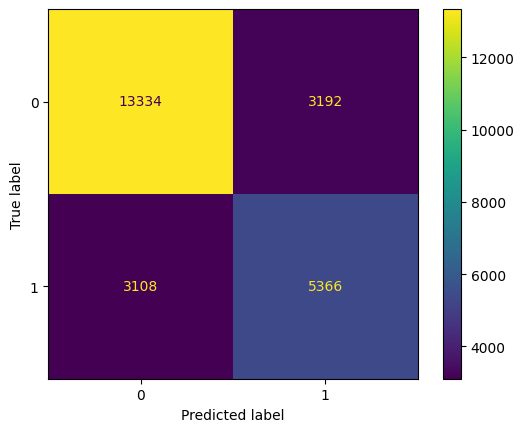

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions using cross_val_predict
predictions = cross_val_predict(dt_classifier, features, labels, cv=modelSplit)

# Generate the confusion matrix
cm = confusion_matrix(labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

The total amount of zeros and ones are respectively

In [ ]:
Nzeros = 13334 + 3192
print(Nzeros)

Nones = 3108 + 5366
print(Nones)

# Which sum up to
total = Nzeros + Nones
print(total)

# Which should be the same as
print(len(labels))

16526
8474
25000
25000


In the confusion matrix, the following values of true positive, false negative, etc, which were defined in the previous section, are located as follows:

TN    FP

FN    TP

Therefore, we can see that the true zeros that are predicted as zeros make up a major part of the model: **TN = 13334**. Whereas, the true ones that are predicted as ones, **TP = 5366**, do not make up a big part, relatively, to the ones that are classified incorrectly as zeros, **FN = 3108**, or the zeros that are classified incorrectly as ones, **FP = 3192**. We notice how the relative sizes of FN and FP are very similar, 3108 and 3192, respectfully, so neither of the errors dominate the data.

In the next section we will use a support vector machine (SVM) to make a classifier and compare it to the DT classifier we created in this section.

### Part 3: SVMs

Now we perform the same phases of training a model, calculating the test scores and creating the confusion matrix, as we did in the last section for a decision tree (DT), but now we train a support vector machine (SVM). Particularly, we create a support vector classifier (SVC) to perform the same classification task as the DT and then compare their performance.

In [ ]:
# Let us use the linear SVC with a moderate C-parameter
# (small C -> larger margin between SV; big C -> smaller margin between SV)
sv_classifier = LinearSVC(dual = False, C=300)

In [ ]:
# We can use the previous model split
modelSplit

StratifiedKFold(n_splits=5, random_state=5, shuffle=True)

Then we perform the same cross validations and predictions as in the previous section for the DTC.

In [ ]:
# Perform cross-validation using the split of StratifiedKFold to
# train the SV classifier model and calculate recall scores
cv_results_sv = cross_validate(sv_classifier, features, labels, cv=modelSplit, scoring='recall')

# Extract the test scores (recall in this case)
recall_scores_sv = cv_results_sv['test_score']

# Calculate the average and standard deviation of the scores
average_recall_sv = np.mean(recall_scores_sv)
std_recall_sv = np.std(recall_scores_sv)

print(f"Average Recall: {average_recall_sv:.4f}")
print(f"Standard Deviation of Recall: {std_recall_sv:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average Recall: 0.4477
Standard Deviation of Recall: 0.0067


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We got for the average recall 0.4477 and for the standard deviation 0.0067 between the five different folds. Comparing this to the values of the DTC 0.6332 and 0.0087, we see that the DTC performs better in the classification task, although with a slightly bigger standard deviation.

Then we perform the prediction:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

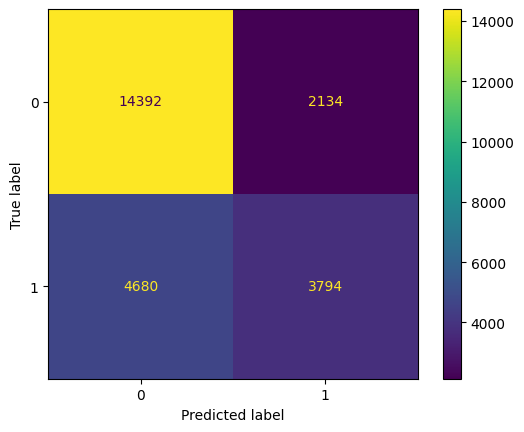

In [ ]:
# Generate predictions using cross_val_predict
predictions_sv = cross_val_predict(sv_classifier, features, labels, cv=modelSplit)

# Generate the confusion matrix
cm_sv = confusion_matrix(labels, predictions_sv)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sv, display_labels=[0, 1])
disp.plot()
plt.show()

Again, the confusion matrix consists of the following parts:

TN    FP

FN    TP

We now notice, comparing to the DTC, that the SVC predicts the true zeros better: there are clearly more correct predictions on TN and there are not as many FP. But, the SVC is not able to classify the true ones as well as the DTC: the ones are actually predicted falsely (FN) more often than correctly (TP).

Therefore, we can deduct, that with an imbalanced data where we have more zeros than ones (more negatives than positives), the DTC performs better in classifying the ones and is relatively good in predicting the zeros, whereas, the SVC is better in classifying the zeros, but fails to classify the ones; the SVC classifies incorrectly the ones more often than correctly.

In the context of the application, i.e. predicting if a Higgs boson was found in a test (or simulation), a machine learning classificator model that fails to classify the ones, is not applicable or useful. Therefore, for this task with this testing data and C-parameter, the DTC should be used instead of SVC.

In the next part we try to optimize the SVC to perform better in the given task.

### Part 4: optimizing the parameters

Let us try to optimize the SVC to make it perform better in the classification task. Let us use the StandardScaler() as the week 5 notebook did. StandardScaler() is a pre-processing tool, also known as Z-score normalization, that transforms features so they have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
piped_model_sv = make_pipeline(StandardScaler(), LinearSVC(dual = False, C = 300))
piped_model_sv.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('linearsvc', LinearSVC(C=300, dual=False))],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(C=300, dual=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearsvc__C': 300,
 'linearsvc__class_weight': None,
 'linearsvc__dual': False,
 'linearsvc__fit_intercept': True,
 'linearsvc__intercept_scaling': 1,
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__max_iter': 1000,
 'linearsvc__multi_class': 'ovr',
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': None,
 'linearsvc__tol': 0.0001,
 'linearsvc__verbose': 0}

Then, let's perform the same tests as before.

In [ ]:
cv_results_piped_sv = cross_validate(piped_model_sv, features, labels, cv = modelSplit, scoring = 'recall')

# Extract the test scores (recall in this case)
recall_scores_piped_sv = cv_results_piped_sv['test_score']

# Calculate the average and standard deviation of the scores
average_recall_piped_sv = np.mean(recall_scores_piped_sv)
std_recall_piped_sv = np.std(recall_scores_piped_sv)

print(f"Average Recall: {average_recall_piped_sv:.4f}")
print(f"Standard Deviation of Recall: {std_recall_piped_sv:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average Recall: 0.4472
Standard Deviation of Recall: 0.0073


Now the recall is 0.4472 and standard deviation 0.0073 between the different folds. This means, that the performance did not enchance. Therefore, using the StandardScaler() did not help, so we try using the general SVC, GridSearchCV and test the performance again.

In [ ]:
piped_model_sv = make_pipeline(StandardScaler(), SVC())
piped_model_sv.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

Let us only take 5% of the data as asked in the instructions so that the calculation time is not unnecessarily long. We take the 5% of both the features and the labels.

In [ ]:
# Take the first 5% of the data
features_subset = features.head(int(len(features) * 0.05))
labels_subset = labels.head(int(len(labels) * 0.05))

print("Shape of features_subset:", features_subset.shape)
print("Shape of labels_subset:", labels_subset.shape)

Shape of features_subset: (1250, 8)
Shape of labels_subset: (1250, 1)


Then we train the model with the parameters which are given to GridSearchCV, which finally gives the model to which we can fit the now 5% of the features and labels.

Essentially, the next code sets a list of parameters which the GridSearchCV uses to test the model in cross-validation for the given metric, now 'recall'. We train the model with '.fit'.

Then, the '.best_params_' contains the best parameters that the GridSearchCV found to be the best in the cross-validation process when calculating the metric recall. Finally, the '.best_score' contains the best recall score with the best parameters.

In [ ]:
parameters = {'svc__kernel':['linear','rbf'],'svc__C':[1, 10, 100], 'svc__gamma':[0.01, 0.1, 0.5], 'svc__class_weight':[{1:1},{1:3},{1:5}]}

# CV para todos los valores de los parámetros del GridSearch
model = GridSearchCV(piped_model_sv, parameters, cv = modelSplit, \
                     verbose = 2, n_jobs = 4, scoring = 'recall')
model.fit(features_subset,labels_subset)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params, best score: 0.9762 {'svc__C': 1, 'svc__class_weight': {1: 5}, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We see that the best score of recall came with parameters:

Recall = 0.9762

{'svc__C': 1, 'svc__class_weight': {1: 5}, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}

This essentially means, that we now only took the first 5% of the data, used StandardScaler(), gave the model a set parameters, from which it found the best combination that maximizes the recall. Now, we achieved a very high recall score, which is more than double in the units of percentage.

So, now achieved a very good score for the SV classifier compared to the earlier ones. We note, that the best combination was to use linear SVM with a very small C = 1. We used C = 300 earlier.

In the next section we study how the imbalance of data can be alleviated.

### Part 5: imbalanced classes

In this section we try to alleviate the imbalance with machine learning methods. These include for instance sampling methods and ensemble methods.

Some methods related to sampling are for instance: RUS - Random undersampling the majority (here negatives); ROS - random oversampling the minority (here the positives; copies); SMOTE - creating a synthetic k-nearest neigbours class of the minority (here the positives). Some methods related to ensemble methods are for instance: bagging, where the average of different models are taken and boosting, where models are set sequentially to correct the previous models' errors.

Let us see how much of the 5% of the data that we took in the last part are ones and how many zeros:

In [ ]:
print("Total of samples in subset ", 0.05*len(labels))
onesInSubset = np.sum(labels_subset)/len(labels_subset)
print("The percentage of ones:")
print(onesInSubset)
print("The percentage of zeros:")
print(1-onesInSubset)
print("Ones in the subset:")
print(onesInSubset*len(labels_subset))
print("Zeros in the subset:")
print((1-onesInSubset)*len(labels_subset))

Total of samples in subset  1250.0
The percentage of ones:
0    0.3376
dtype: float64
The percentage of zeros:
0    0.6624
dtype: float64
Ones in the subset:
0    422.0
dtype: float64
Zeros in the subset:
0    828.0
dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Since we have already reduced the data to 5% of the original, we will not reduce it. Instead, we will oversample the minority class. We will conduct this by taking the next 2.5% of the whole data set that are positive datapoints. 2.5% is 625 samples:

In [ ]:
0.025*25000

625.0

Let us therefore choose the next 625 positive samples for the new model with the following code:

In [ ]:
# Find the indices of the positive samples in the original dataset
positive_indices = labels[labels[0] == 1].index

# Identify the indices that are in the initial subset (first 5%)
initial_subset_indices = labels_subset.index

# Find the positive indices that are NOT in the initial subset
new_positive_indices = positive_indices[~positive_indices.isin(initial_subset_indices)]

# Select the next 625 positive indices
next_positive_indices = new_positive_indices[:625]

# Get the features and labels for these next positive samples
next_positive_features = features.loc[next_positive_indices]
next_positive_labels = labels.loc[next_positive_indices]

# Combine the initial subset with the next positive samples
features_oversampled = pd.concat([features_subset, next_positive_features])
labels_oversampled = pd.concat([labels_subset, next_positive_labels])

print("Shape of features_oversampled:", features_oversampled.shape)
print("Shape of labels_oversampled:", labels_oversampled.shape)

Shape of features_oversampled: (1875, 8)
Shape of labels_oversampled: (1875, 1)


Next, we use the new oversampled data sets, train the SVC model and test it in the same manner as we did the previous section. We remember that the best parameters were:

{'svc__C': 1, 'svc__class_weight': {1: 5}, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}.

We can make use of the previous setups:

In [ ]:
piped_model_sv
piped_model_sv.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

And then do the training and testing with the one set of parameters:

In [ ]:
# Use only one set of parameters, the bets parameters found in the previous section
parameters = {'svc__kernel':['linear'],'svc__C':[1], 'svc__gamma':[0.01], 'svc__class_weight':[{1:5}]}

# CV para todos los valores de los parámetros del GridSearch
model = GridSearchCV(piped_model_sv, parameters, cv = modelSplit, \
                     verbose = 2, n_jobs = 4, scoring = 'recall')

# Fit the model with the new oversampled data sets
model.fit(features_oversampled,labels_oversampled)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best params, best score: 0.9742 {'svc__C': 1, 'svc__class_weight': {1: 5}, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}


We got now for the metric score:

Recall = 0.9742, which is suprisingly less than in the previous section without the oversampling, which had a recall = 0.9762.

We maybe used a bit different oversampling method: usually the minority class samples are duplicated or completely synthetic samples are created. Here, instead, we took more of the data into account, but only the minority class samples.

Since the recall score worsened, even though only slightly, it seems that the distribution of the samples are that different, that the next 625 positive samples did not make the prediction more accurate. The reason might also be the one feature, that had in its distribution the large negative values of -999.

It seems, that different softening methods of imbalanced data should be used. On the other hand, with the best parameters, a recall score of 0.9762 is already very good and might not require enhancement. In the next section we conlcude this work.

### Part 6: conclusions

According to this exercise, the best algorithm for the classification of the Higgs boson data was a linear support vector classifier (SCV) with a small C-parameter. The other optimal parameters are found in section 4. A small C maximizes the margin between the classes.

Since the data was imbalanced and there was one feature that had an unsual distribution with a relatively frequent value separate from the rest of the distribution, we noticed an effect to the models. The inital models made with a decision tree classifier (DTC) and support vector classifier (SVC) of somewhat aleatory parameter values did not perform well in the recall metric. When we optimized the parameters for the linear SVC, we got very good results that are considered to be accurate enough to use in an application.

We have to note, that because of the calculation time, we only used a small part 7,5% of the whole data. In a real case when building a machine learning model for an application, we should use if not all, most of the data, and test even more different methods, such as boosting, i.e. using several models sequentially.